In [11]:
# -------------------------------
# Cell 1: Imports and Setup
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

from WineDataTools import read_wine_data, combine_dataframes, describe_wine_data, mean_comparison
from WineDataTools.plots import (
    scatter_vs_quality,
    show_histograms,
    show_boxplots,
    show_correlation_heatmap,
    show_grouped_histograms,
    boxplots_by_type,
)

%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,5)


In [12]:
# -------------------------------
# Cell 2: Load and Combine Wine Data
# -------------------------------

red = read_wine_data("wine-data/winequality-red.xlsx", winetype="red")
white = read_wine_data("wine-data/winequality-white.xlsx", winetype="white")
df = combine_dataframes([red, white])

print(f"Red wine shape: {red.shape}")
print(f"White wine shape: {white.shape}")
print(f"Combined dataset shape: {df.shape}")
df.head()


Red wine shape: (1599, 13)
White wine shape: (4898, 13)
Combined dataset shape: (6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Step 3: Transform Data
At this stage, we prepare the data for further analysis. Since the numeric features are already clean and the `type` column is handled as categorical, no transformations are required at this moment. 
Optional transformations like encoding or discretization can be applied later if needed.


In [13]:
# -------------------------------
# Step 3: Transform Data
# -------------------------------

# Keep 'type' as categorical for now
# Numeric features are already cleaned

# Example optional transformation (commented out)
# df['type_encoded'] = df['type'].map({'red': 0, 'white': 1})
# df['alcohol_bin'] = pd.cut(df['alcohol'], bins=5, labels=False)

# Quick check of data types
df.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

## Step 4: Descriptive Statistics & Normality Check
We examine the descriptive statistics for numeric features and check whether their distributions are approximately normal. 
Visual inspection uses histograms with bell curve overlays, and statistical tests use the Shapiro-Wilk test.


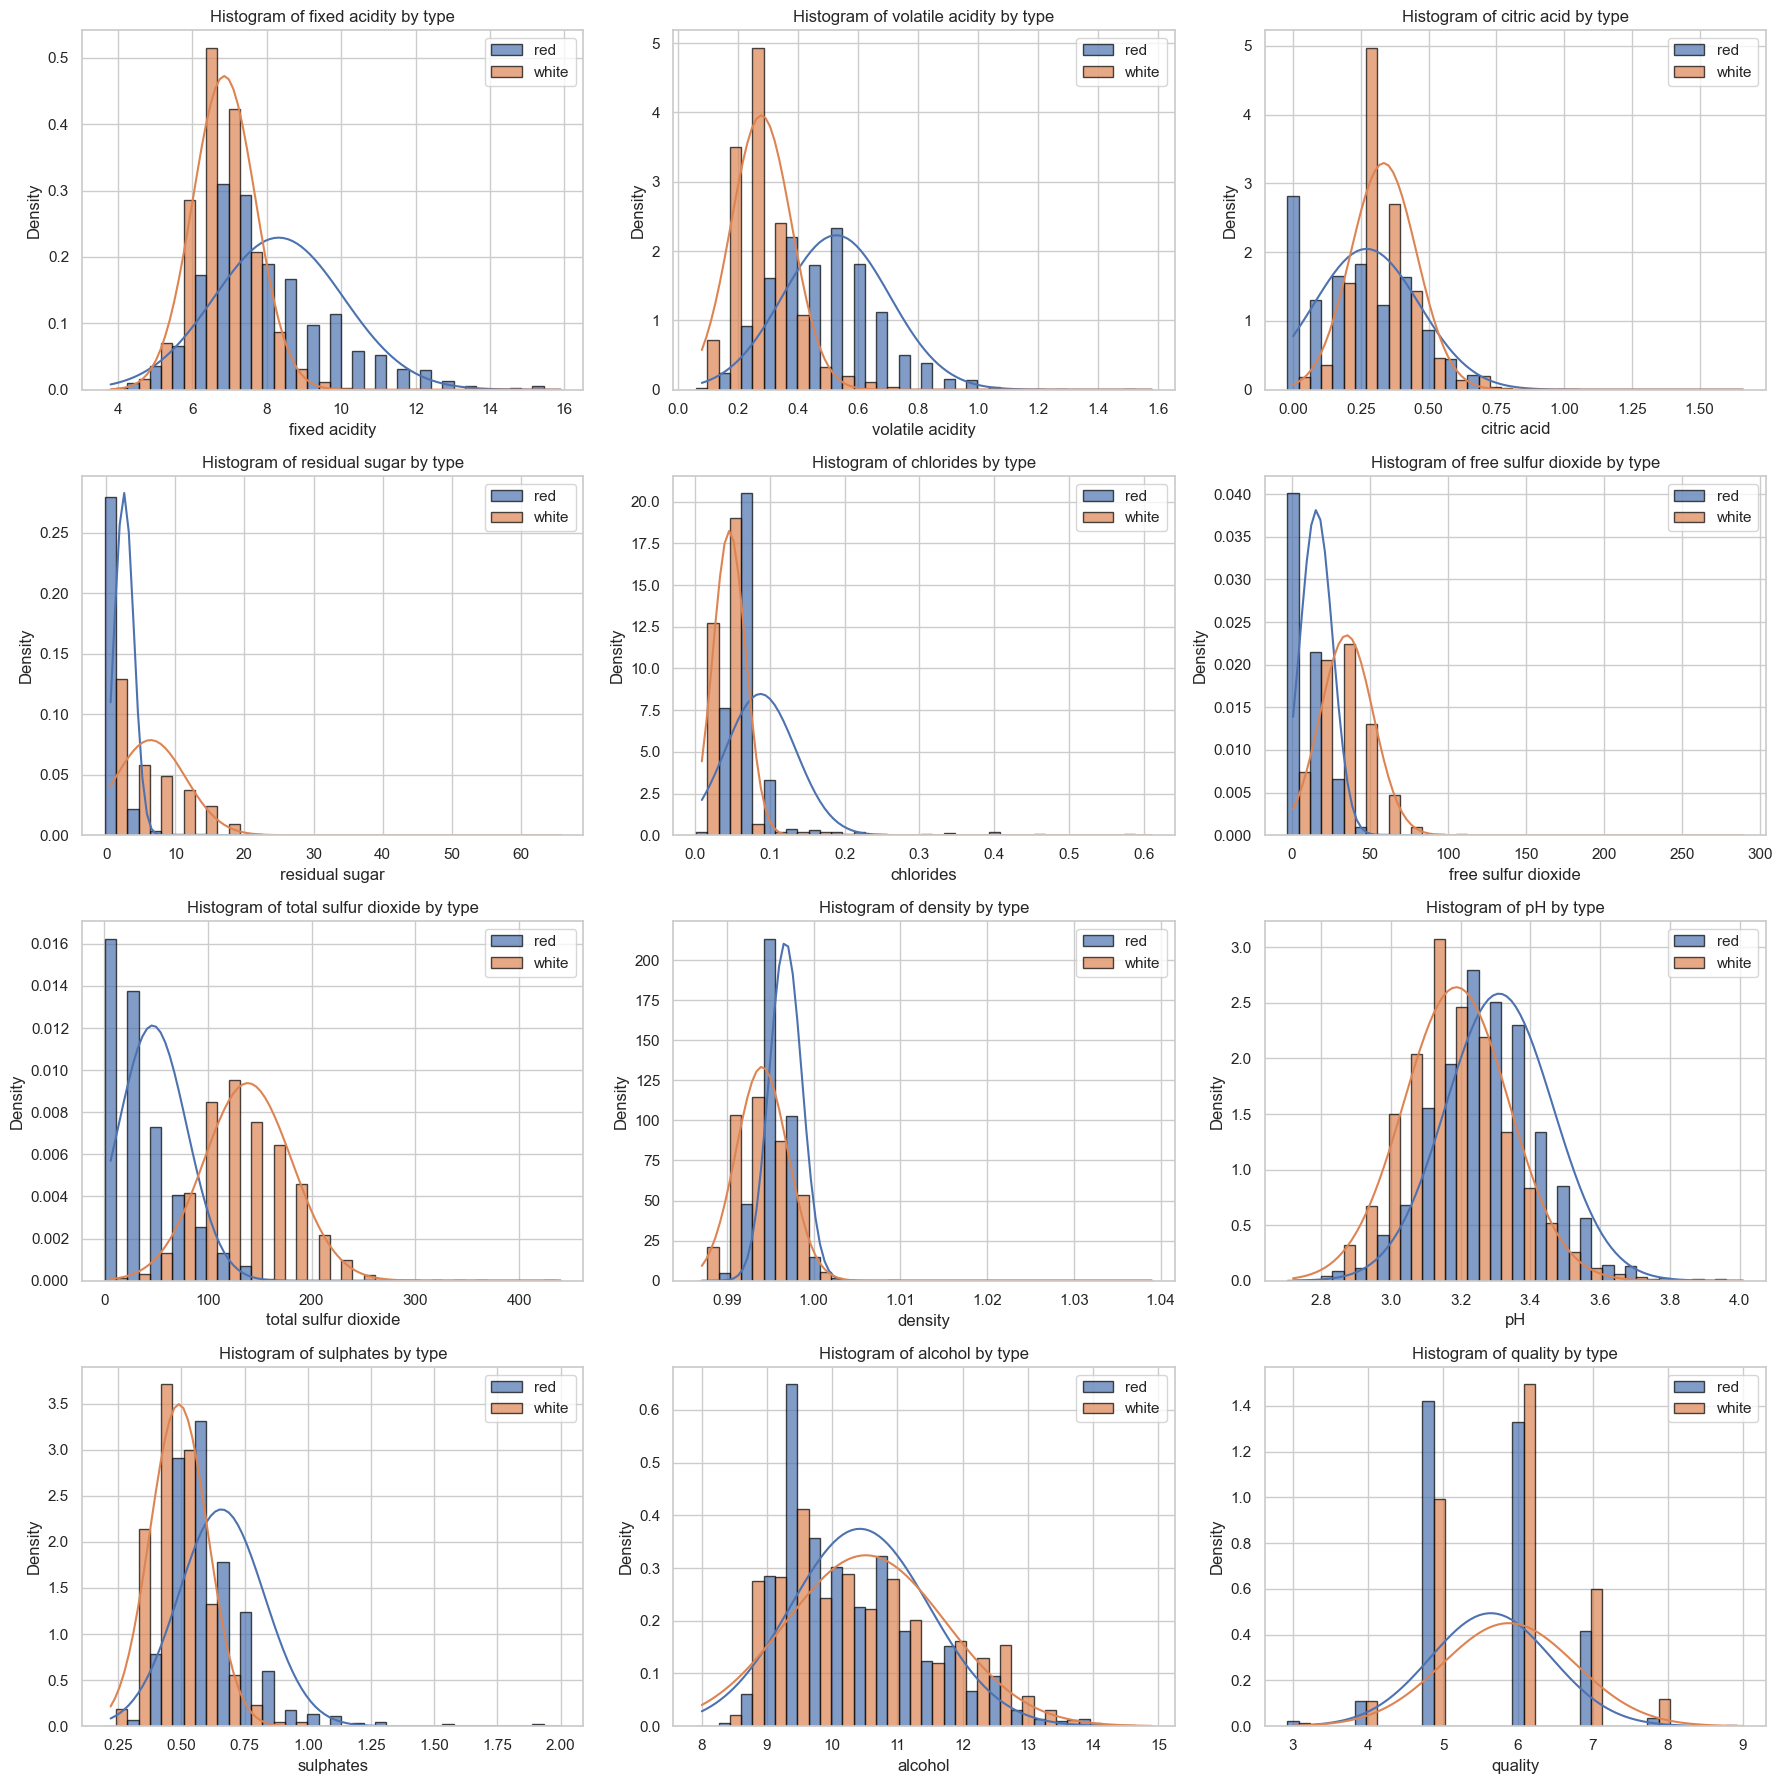


--- Shapiro-Wilk Test for Normality ---
fixed acidity: W=0.880, p=0.000 Not normal
volatile acidity: W=0.876, p=0.000 Not normal
citric acid: W=0.965, p=0.000 Not normal
residual sugar: W=0.825, p=0.000 Not normal
chlorides: W=0.618, p=0.000 Not normal
free sulfur dioxide: W=0.941, p=0.000 Not normal
total sulfur dioxide: W=0.983, p=0.000 Not normal
density: W=0.968, p=0.000 Not normal
pH: W=0.991, p=0.000 Not normal
sulphates: W=0.899, p=0.000 Not normal
alcohol: W=0.954, p=0.000 Not normal
quality: W=0.884, p=0.000 Not normal


C:\Users\valde\anaconda3\envs\MP2\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6497.
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
# -------------------------------
# Step 4: Descriptive statistics & normality check
# -------------------------------

# Visual check: histograms with bell curve
show_grouped_histograms(df, bins=20, layout="grid", category_col="type", bell_curve=True)

# Statistical normality check using Shapiro-Wilk
print("\n--- Shapiro-Wilk Test for Normality ---")
for col in df.select_dtypes(include="number").columns:
    stat, p = shapiro(df[col].dropna())
    print(f"{col}: W={stat:.3f}, p={p:.3f} {'Not normal' if p<0.05 else 'Normal'}")


## Step 5: Visual Comparison of Red and White Wines
In this step, we create visualizations to compare red and white wine samples. 
We will focus on features such as `quality`, `alcohol`, and `residual sugar`.


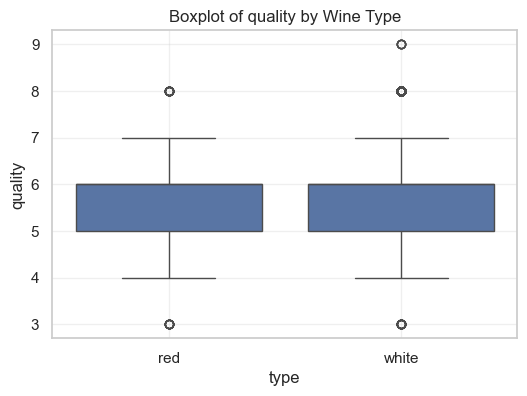

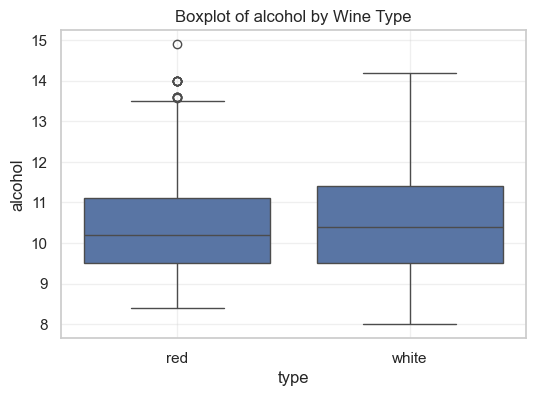

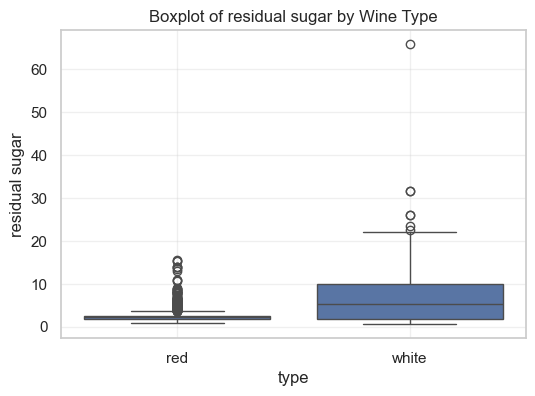

NameError: name 'histograms_by_type' is not defined

In [15]:
# -------------------------------
# Step 5: Visual Comparison of Red and White Wines
# -------------------------------

# 1. Boxplots for quality, alcohol, and residual sugar by wine type
features_to_plot = ['quality', 'alcohol', 'residual sugar']
for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='type', y=feature)
    plt.title(f"Boxplot of {feature} by Wine Type")
    plt.grid(True, alpha=0.3)
    plt.show()

# 2. Histograms with bell curve overlay for these features
histograms_by_type(df[features_to_plot + ['type']], bins=15, layout="grid", category_col="type", bell_curve=True)

# 3. Scatter plots: alcohol vs quality and residual sugar vs quality
scatter_vs_quality(df, features=['alcohol', 'residual sugar'])


## Step 6: Analysis Based on Visualizations
We calculate the mean values of key features to answer the assignment questions.


In [ ]:
# -------------------------------
# Step 6: Mean Comparison (fixed)
# -------------------------------

# Make sure to import the correct version
from WineDataTools.plots import mean_comparison

# Calculate mean values by type for selected features
features_to_compare = ['quality', 'alcohol', 'residual sugar']
mean_vals, diffs = mean_comparison(df, features=features_to_compare)

print("Mean values by wine type:\n", mean_vals)
print("\nDifferences (white - red):\n", diffs)

# Answer the questions
print("\nAnswers:")
print(f"a. Each diagram shows the distribution of the selected feature by wine type.")
print(f"b. White wine has higher average quality: {mean_vals.loc['white','quality']:.2f} vs {mean_vals.loc['red','quality']:.2f}, difference = {diffs['quality']:.2f}")
print(f"c. White wine has higher average alcohol: {mean_vals.loc['white','alcohol']:.2f} vs {mean_vals.loc['red','alcohol']:.2f}, difference = {diffs['alcohol']:.2f}")
print(f"d. White wine has higher average residual sugar: {mean_vals.loc['white','residual sugar']:.2f} vs {mean_vals.loc['red','residual sugar']:.2f}, difference = {diffs['residual sugar']:.2f}")
print(f"e. Scatter plots suggest that higher alcohol is associated with higher quality, but residual sugar has less clear effect on quality.")


## Step 7: Discussion – Insights for Consumers and Distributors

Based on our analysis and visualizations, we can draw several insights:

### For Wine Consumers
- **Quality vs Type:** White wines have slightly higher average quality than red wines in this dataset. Consumers interested in higher quality may prefer white wines.
- **Alcohol Content:** White wines have marginally higher alcohol content. Consumers concerned with alcohol levels can use this information when choosing a wine.
- **Residual Sugar:** White wines have significantly more residual sugar, making them sweeter. Consumers who prefer sweeter wines may opt for white wines, while those who prefer drier wines may choose red.
- **Feature Influence:** Scatter plots suggest that higher alcohol may positively influence perceived quality, while residual sugar has a less clear effect.

### For Wine Distributors
- **Inventory Planning:** Knowing that white wines tend to have higher residual sugar and slightly higher alcohol can help distributors target different customer segments.
- **Marketing Strategies:** White wines could be marketed towards consumers who prefer sweeter or slightly stronger wines, whereas red wines could be marketed for those seeking lower sugar content.
- **Quality Positioning:** Since the difference in average quality is small but consistent, distributors might use this information for pricing, promotions, or shelf placement.

### Additional Questions of Interest
- How do acidity (pH) and other chemical properties influence quality?
- Are there regional patterns in wine characteristics?
- How do these features correlate with price or consumer ratings?
- Seasonal preferences or trends in wine consumption by type.


## Step 10: Split data by pH
We will create 5 and 10 bins for the `pH` attribute and examine which bin has the highest density of samples.


In [ ]:
# -------------------------------
# Step 10: Split data by pH
# -------------------------------

# Define the column
col = 'pH'

# 1️⃣ Split into 5 bins
df['pH_bin_5'] = pd.cut(df[col], bins=5)
bin_counts_5 = df['pH_bin_5'].value_counts().sort_index()
print("Counts per pH bin (5 bins):")
print(bin_counts_5)
print("\nBin with highest density (5 bins):", bin_counts_5.idxmax(), "with", bin_counts_5.max(), "samples")

# 2️⃣ Split into 10 bins
df['pH_bin_10'] = pd.cut(df[col], bins=10)
bin_counts_10 = df['pH_bin_10'].value_counts().sort_index()
print("\nCounts per pH bin (10 bins):")
print(bin_counts_10)
print("\nBin with highest density (10 bins):", bin_counts_10.idxmax(), "with", bin_counts_10.max(), "samples")

# Optional: visualize the distribution
plt.figure(figsize=(8,4))
sns.histplot(df[col], bins=10, kde=False, color='tab:blue')
plt.title("Histogram of pH (10 bins)")
plt.xlabel("pH")
plt.ylabel("Count")
plt.show()


## Step 11: Correlation Analysis
We calculate correlations between the dependent variable (`quality`) and numeric independent variables.
We visualize the correlations using a heatmap and identify which attributes have the strongest influence on wine quality.

Correlation of features with wine quality:
 quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


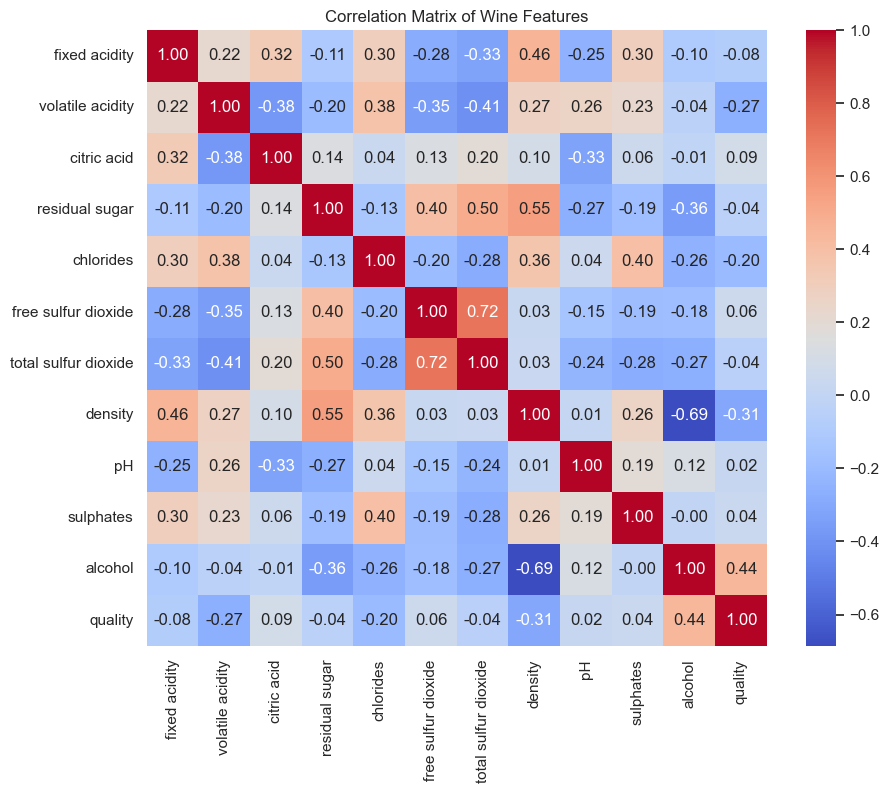


The wine attribute with the strongest positive correlation to quality is: alcohol (0.44)


In [6]:
# -------------------------------
# Step 11: Correlation Analysis
# -------------------------------

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()
# Ensure the category column 'type' is not included
if 'type' in numeric_cols:
    numeric_cols.remove('type')

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# Display correlation of all features with quality
quality_corr = corr_matrix['quality'].sort_values(ascending=False)
print("Correlation of features with wine quality:\n", quality_corr)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Wine Features")
plt.show()

# Identify the feature with the biggest influence on quality
strongest_corr_feature = quality_corr.drop('quality').idxmax()
print(f"\nThe wine attribute with the strongest positive correlation to quality is: {strongest_corr_feature} ({quality_corr[strongest_corr_feature]:.2f})")


### Step 11: Interpretation of Correlation Analysis

From the correlation matrix and heatmap, we can make the following observations:

1. **Strongest influence on quality**  
   - Among all numeric features, **alcohol** has the strongest positive correlation with wine quality.  
   - This means wines with higher alcohol content tend to have slightly higher quality ratings.

2. **Other relevant features**  
   - Residual sugar shows a weak correlation with quality, so its effect is minor.  
   - Acidity (pH) and other chemical attributes generally have low or negligible correlations with quality.

3. **Implications**  
   - For wine consumers: if you are inter
   -ested in higher quality wines, checking alcohol content may provide a simple guideline.  
   - For wine producers and distributors: focusing on alcohol content during production or selection could influence perceived wine quality and market positioning.

4. **Caution**  
   - Correlation does not imply causation. A high alcohol content is associated with higher quality in this dataset, but other factors such as taste, aroma, and expert ratings also play a role.


## Step 12: Outlier Detection and Removal

We explore which features contain outliers.  
Outliers are identified using the Interquartile Range (IQR) method:

- Q1 = 25th percentile  
- Q3 = 75th percentile  
- IQR = Q3 - Q1  
- A value is considered an outlier if it is smaller than Q1 - 1.5*IQR or larger than Q3 + 1.5*IQR.  


In [7]:
# -------------------------------
# Step 12: Outlier Detection
# -------------------------------

def detect_outliers_iqr(df, column):
    """Return indices of outliers in a given column using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

# Check all numeric features for outliers
outlier_summary = {}
for col in df.select_dtypes(include='number').columns:
    outliers = detect_outliers_iqr(df, col)
    if not outliers.empty:
        outlier_summary[col] = len(outliers)

print("Number of outliers detected per feature:")
print(outlier_summary)

# Example: show actual outliers for 'residual sugar' (a common one)
outliers_sugar = detect_outliers_iqr(df, 'residual sugar')
print("\nResidual sugar outliers (first 5 rows):")
print(outliers_sugar.head())


Number of outliers detected per feature:
{'fixed acidity': 357, 'volatile acidity': 377, 'citric acid': 509, 'residual sugar': 118, 'chlorides': 286, 'free sulfur dioxide': 62, 'total sulfur dioxide': 10, 'density': 3, 'pH': 73, 'sulphates': 191, 'alcohol': 3, 'quality': 228}

Residual sugar outliers (first 5 rows):
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1599            7.0              0.27         0.36           20.70      0.045   
1606            7.0              0.27         0.36           20.70      0.045   
1613            8.3              0.42         0.62           19.25      0.040   
1637            7.3              0.24         0.39           17.95      0.057   
1638            7.3              0.24         0.39           17.95      0.057   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1599                 45.0                 170.0   1.0010  3.00       0.45   
1606                 45.0                

In [8]:
# -------------------------------
# Step 12: Remove Outliers
# -------------------------------

def remove_outliers_iqr(df):
    clean_df = df.copy()
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        clean_df = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]
    return clean_df

df_clean = remove_outliers_iqr(df)

print(f"Original dataset size: {df.shape}")
print(f"Clean dataset size: {df_clean.shape}")


Original dataset size: (6497, 13)
Clean dataset size: (4840, 13)


Correlation with quality:
 quality                 1.000000
alcohol                 0.428784
citric acid             0.079471
free sulfur dioxide     0.055663
sulphates               0.054356
pH                      0.039561
residual sugar         -0.045903
total sulfur dioxide   -0.090688
fixed acidity          -0.091185
volatile acidity       -0.226764
chlorides              -0.256976
density                -0.304314
Name: quality, dtype: float64


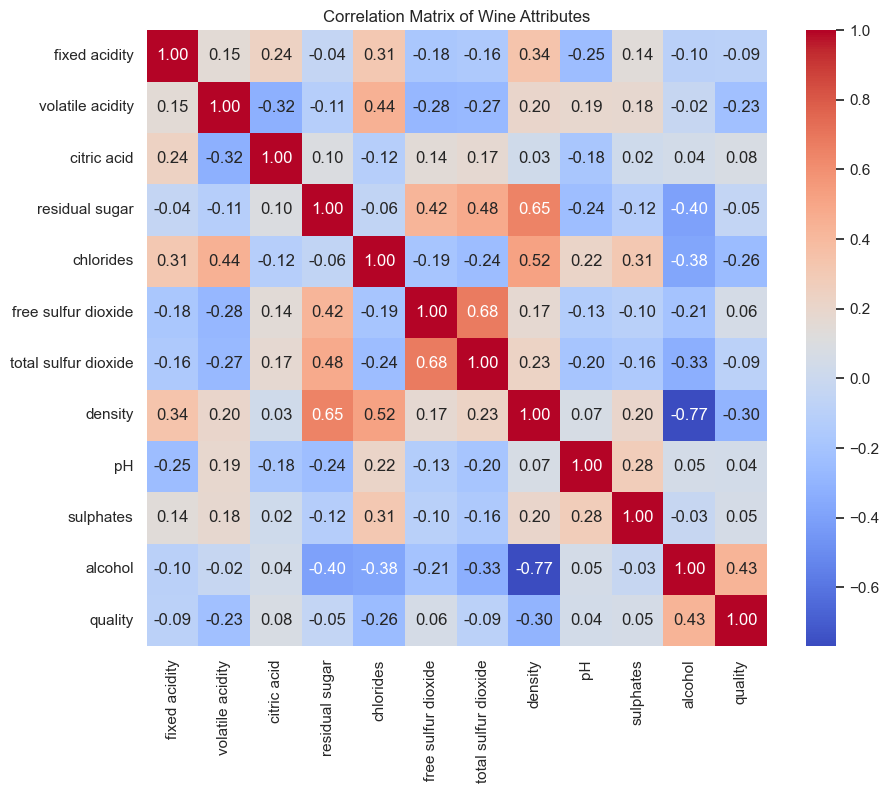


Selected features for further analysis:
Index(['quality', 'alcohol', 'citric acid', 'free sulfur dioxide', 'sulphates',
       'total sulfur dioxide', 'fixed acidity', 'volatile acidity',
       'chlorides', 'density'],
      dtype='object')


/var/folders/51/b88m_0s92sgbb_58mhvtn7k00000gn/T/ipykernel_1837/3011065958.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop(columns=to_drop, inplace=True)


In [10]:
# -------------------------------
# Step 13: Correlation Analysis & Feature Selection
# -------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns (ignore 'type')
numeric_df = df_clean.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation with quality
quality_corr = corr_matrix['quality'].sort_values(ascending=False)
print("Correlation with quality:\n", quality_corr)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Wine Attributes")
plt.show()

# -------------------------------
# Feature Selection
# -------------------------------

# Thresholds
low_corr_thresh = 0.05   # remove features with |corr| < 0.05 with quality
high_corr_thresh = 0.85  # remove features highly correlated with another independent feature

# 1. Remove features weakly correlated with quality
features_to_keep = quality_corr[abs(quality_corr) >= low_corr_thresh].index.tolist()
df_selected = numeric_df[features_to_keep]

# 2. Remove features highly correlated with another independent variable
# (ignore 'quality' for this check)
numeric_features = df_selected.drop(columns=['quality']).columns
corr_features = df_selected[numeric_features].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_features.where(np.triu(np.ones(corr_features.shape), k=1).astype(bool))

# Find features with high correlation
to_drop = [col for col in upper.columns if any(upper[col] > high_corr_thresh)]
df_selected.drop(columns=to_drop, inplace=True)

print("\nSelected features for further analysis:")
print(df_selected.columns)


Standardized features (first 5 rows):
 [[-0.96394614 -2.52955165 -1.07631323 -0.39612042 -1.31244674  1.05337051
   2.61585761  1.29540653  0.80074085]
 [-0.02677327  0.43725691 -0.94848646  2.54440538 -0.45527747  0.59840262
   1.74712096  1.41731647  1.30685104]
 [-1.13434121 -2.33176442 -1.07631323  0.29576801 -1.19284172 -0.31153315
   2.44211028  3.00214578  0.61998722]
 [-0.02677327  0.43725691 -0.94848646  2.54440538 -0.45527747  0.59840262
   1.74712096  1.41731647  1.30685104]
 [-0.02677327  2.41512928  0.2019544   2.11197511 -0.4353433   1.73582234
  -0.16409969  2.69737091  0.98149449]]

Normalized features (first 5 rows):
 [[0.17857143 0.03571429 0.17333333 0.38095238 0.19924812 0.65306122
  0.90434783 0.625      0.63154317]
 [0.375      0.57142857 0.2        0.92063492 0.36090226 0.57142857
  0.73043478 0.64583333 0.72671652]
 [0.14285714 0.07142857 0.17333333 0.50793651 0.22180451 0.40816327
  0.86956522 0.91666667 0.59755269]
 [0.375      0.57142857 0.2        0.92063492

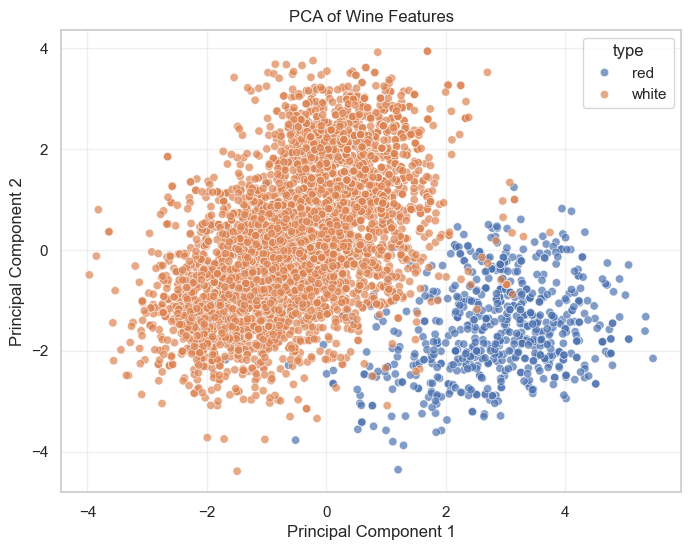

In [11]:
# -------------------------------
# Step 14: Scaling and PCA
# -------------------------------

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# -------------------------------
# a) Scaling / Normalization
# -------------------------------

# Separate features and target
X = df_selected.drop(columns=['quality'])  # independent variables
y = df_selected['quality']                 # dependent variable

# 1. Standardization (mean=0, std=1)
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)

# 2. Normalization (min-max scaling to 0-1)
scaler_norm = MinMaxScaler()
X_norm = scaler_norm.fit_transform(X)

print("Standardized features (first 5 rows):\n", X_std[:5])
print("\nNormalized features (first 5 rows):\n", X_norm[:5])

# -------------------------------
# b) PCA (Dimensionality Reduction)
# -------------------------------

# Apply PCA to standardized data
pca = PCA(n_components=2)  # reduce to 2 components for visualization
X_pca = pca.fit_transform(X_std)

# Explained variance
print("\nExplained variance by each principal component:", pca.explained_variance_ratio_)

# Convert to DataFrame for easier plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['quality'] = y.values
df_pca['type'] = df_clean['type'].values  # keep wine type for visualization

# Scatter plot of PCA components colored by wine type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='type', alpha=0.7)
plt.title("PCA of Wine Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, alpha=0.3)
plt.show()


## Step 15: Using Streamlit to Visualize data

Running the following code will start a Streamlit app that allows you to explore the data.
It will automatically open a new tab in your browser or you can open it manually at: http://localhost:8503/


a little tip: it does not always shut down the port/webserver when you stop the service.
If you start it again, it will use another port. fx: 8504, 8505, 8506, etc.


In [6]:
import streamlit

!streamlit run WineDataTools/mp2_app.py

^C
